In [1]:
!curl -LOk https://github.com/Nomikxyz/retinopathy-dataset/archive/master.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   133    0   133    0     0    386      0 --:--:-- --:--:-- --:--:--   385
100 1893M    0 1893M    0     0  19.2M      0 --:--:--  0:01:38 --:--:-- 18.9M


In [2]:
!unzip master.zip

Archive:  master.zip
5054971f098b5438babd15da21bea4153d4424a9
   creating: retinopathy-dataset-master/
  inflating: retinopathy-dataset-master/README.md  
   creating: retinopathy-dataset-master/nosymptoms/
  inflating: retinopathy-dataset-master/nosymptoms/10265_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10643_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10643_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10845_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10942_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10945_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10947_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10947_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10962_left.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/10962_right.jpeg  
  inflating: retinopathy-dataset-master/nosymptoms/1096_left.jpeg  
  inflating: retinopathy-datase

In [3]:
import os, shutil

# List all filenames in the master dataset and count how many samples there are
original_dir = './retinopathy-dataset-master'

class1 = 'nosymptoms'
original_nosymptoms_dir = os.path.join(original_dir, class1)
nosymptoms_fnames = os.listdir(original_nosymptoms_dir)

class2 = 'symptoms'
original_symptoms_dir = os.path.join(original_dir, class2)
symptoms_fnames = os.listdir(original_symptoms_dir)

len(nosymptoms_fnames), len(symptoms_fnames)

(1468, 595)

In [0]:

# Base directory is where the datasets will be created
base_dir = './dataset2'

# For training set
sub_dir = 'train'
train_dir = os.path.join(base_dir, sub_dir)
train_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
train_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

# For validation set
sub_dir = 'validation'
validation_dir = os.path.join(base_dir, sub_dir)
validation_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
validation_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

# For test set
sub_dir = 'test'
test_dir = os.path.join(base_dir, sub_dir)
test_nosymptoms_dir = os.path.join(base_dir, sub_dir, class1)
test_symptoms_dir = os.path.join(base_dir, sub_dir, class2)

In [5]:
try:
    print('Creating dataset folders to:', base_dir)
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(train_nosymptoms_dir)
    os.mkdir(train_symptoms_dir)
    os.mkdir(validation_dir)
    os.mkdir(validation_nosymptoms_dir)
    os.mkdir(validation_symptoms_dir)
    os.mkdir(test_dir)
    os.mkdir(test_nosymptoms_dir)
    os.mkdir(test_symptoms_dir)
    print('Done.')
except:
    print('Error:')
    print(base_dir, 'already exists!')

Creating dataset folders to: ./dataset2
Done.


In [6]:
from sklearn.model_selection import train_test_split
from numpy import random


# Set the random seed
random.seed(2019)

# Disease (symptom) cases split

# Take 25 % out for testing
train_symptoms_fnames, test_symptoms_fnames = train_test_split(symptoms_fnames, test_size = 0.25)

# From the remaining images take 1/3 out for validation (= (1-0.25)*1/3 = 0.25)
train_symptoms_fnames, validation_symptoms_fnames = train_test_split(train_symptoms_fnames, test_size = 1.0/3.0)

len(train_symptoms_fnames), len(validation_symptoms_fnames), len(test_symptoms_fnames)
# For debugging purposes, remove the comment marks.
# print(train_symptoms_fnames)
# print(validation_symptoms_fnames)
# print(test_symptoms_fnames)

(297, 149, 149)

In [7]:
# Healthy (nosyptom) cases split

# Take 25 % out for testing
train_nosymptoms_fnames, test_nosymptoms_fnames = train_test_split(nosymptoms_fnames, test_size = 0.25)

# From the remaining take 1/3 out for validation
train_nosymptoms_fnames, validation_nosymptoms_fnames = train_test_split(train_nosymptoms_fnames, test_size = 1.0/3.0)

len(train_nosymptoms_fnames), len(validation_nosymptoms_fnames), len(test_nosymptoms_fnames)
# For debugging purposes, remove the comment marks.
# print(train_nosymptoms_fnames)
# print(validation_nosymptoms_fnames)
# print(test_nosymptoms_fnames)

(734, 367, 367)

In [8]:
import time
tStart = time.time()

# Copy the original files into the dataset folders

# Training set
# Disease 
for fname in train_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(train_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy 
for fname in train_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(train_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# Validation set
# Disease 
for fname in validation_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(validation_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy
for fname in validation_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(validation_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

# Test set
# Disease
for fname in test_symptoms_fnames:
    src = os.path.join(original_symptoms_dir, fname)
    dst = os.path.join(test_symptoms_dir, fname)
    shutil.copyfile(src, dst)
# Healthy
for fname in test_nosymptoms_fnames:
    src = os.path.join(original_nosymptoms_dir, fname)
    dst = os.path.join(test_nosymptoms_dir, fname)
    shutil.copyfile(src, dst)

tStop = time.time()
tElapsed = tStop - tStart
print('Time elapsed: {:.2f} sec'.format(tElapsed))

Time elapsed: 13.57 sec


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

Using TensorFlow backend.


In [10]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flat

In [0]:
from keras import optimizers

# Let's use slower learning rate than by default
# https://keras.io/optimizers/

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_dir,
    # All images will be resized to 150x150
    target_size=(150, 150),

    # We read images in batches
    batch_size=16,
    
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [13]:
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)
data batch shape: (16, 150, 150, 3)
labels batch shape: (16,)


In [14]:
# Check the last labels batch
labels_batch

array([0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

In [15]:

# Our first trial is to read only 10 batches per epoch (10x16 = 160 images per epoch)
# and run only 5 epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 10,
      verbose = 1,
      epochs = 5,
      validation_data = validation_generator,
      validation_steps = 10)

# Save the model
model.save('case_2_run_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10/10 [==============================] - 42s 4s/step - loss: 0.5929 - acc: 0.7000 - val_loss: 0.6201 - val_acc: 0.6937
Epoch 2/5
10/10 [==============================] - 37s 4s/step - loss: 0.6259 - acc: 0.6625 - val_loss: 0.5428 - val_acc: 0.7625
Epoch 3/5
10/10 [==============================] - 41s 4s/step - loss: 0.5051 - acc: 0.7625 - val_loss: 0.5698 - val_acc: 0.6937
Epoch 4/5
10/10 [==============================] - 37s 4s/step - loss: 0.5259 - acc: 0.7500 - val_loss: 0.5346 - val_acc: 0.7095
Epoch 5/5
10/10 [==============================] - 39s 4s/step - loss: 0.5631 - acc: 0.6937 - val_loss: 0.5333 - val_acc: 0.7312


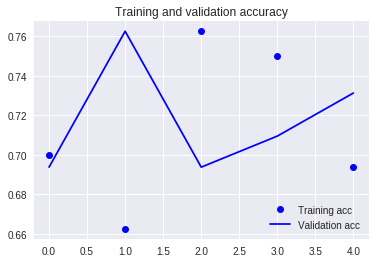

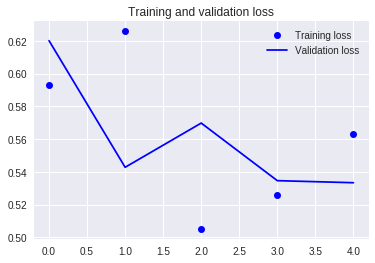

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
